# EXPLORATORY DATA ANALYSIS SOURCE 2

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('Stress_Dataset.csv')

In [4]:
df.rename(columns={"Which type of stress do you primarily experience?":"stress_type"},inplace=True)
df=df[(df["Age"]>=18) & (df["Age"]<=21)]
df.reset_index(drop=True, inplace=True)

In [5]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

### UNIVARIATE ANALYSIS  - Numerical variables

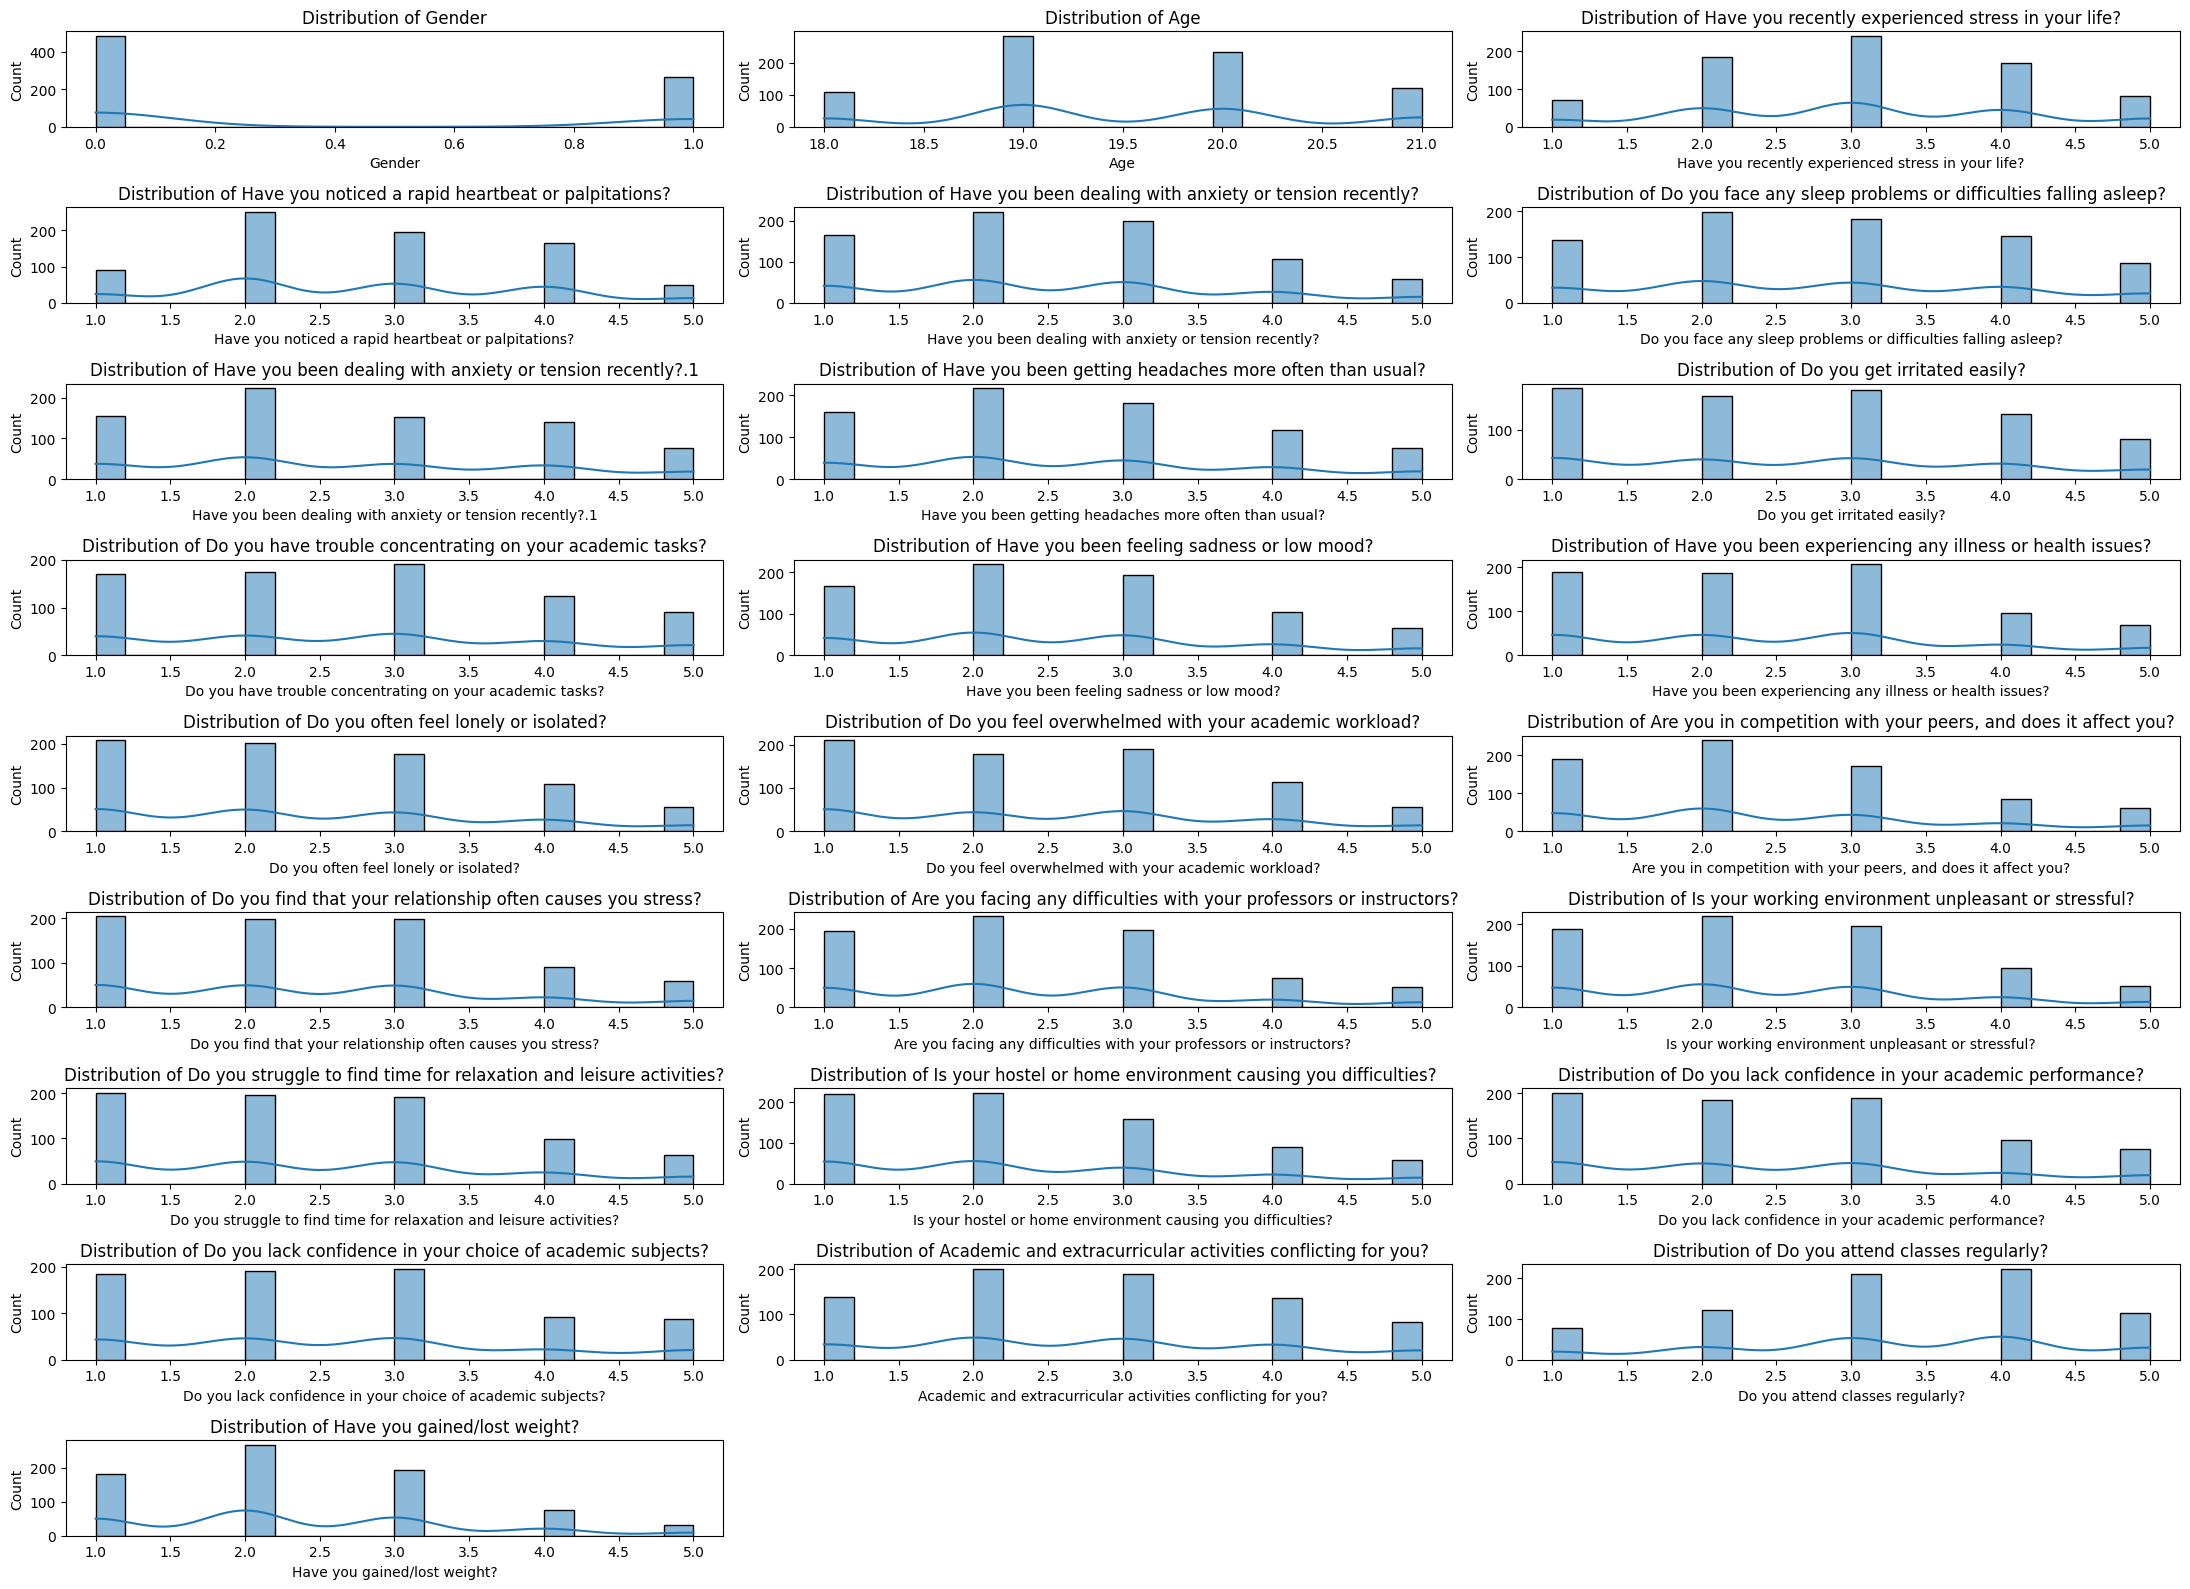

In [6]:
plt.figure(figsize=(22,16))
for i,col in enumerate(num_cols,1):
    plt.subplot(9,3,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### UNIVARIATE ANALYSIS  - Categorical variables (target variable)

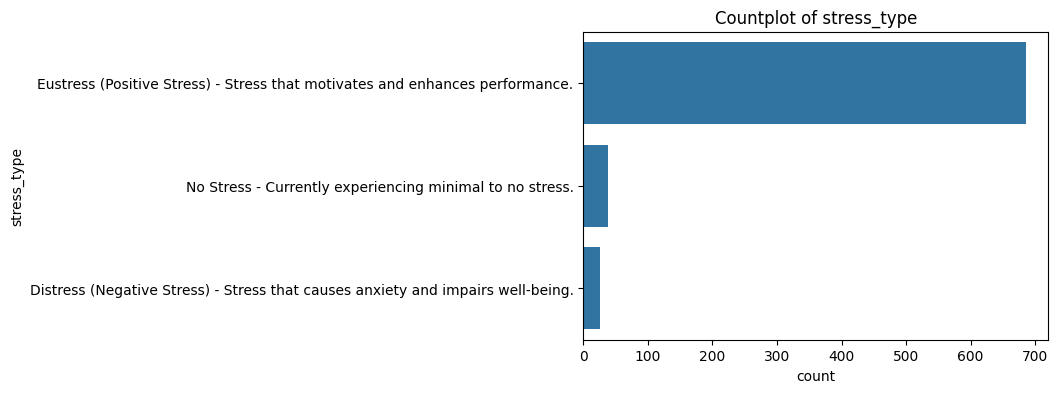

In [7]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

### CORRELATION HEATMAP

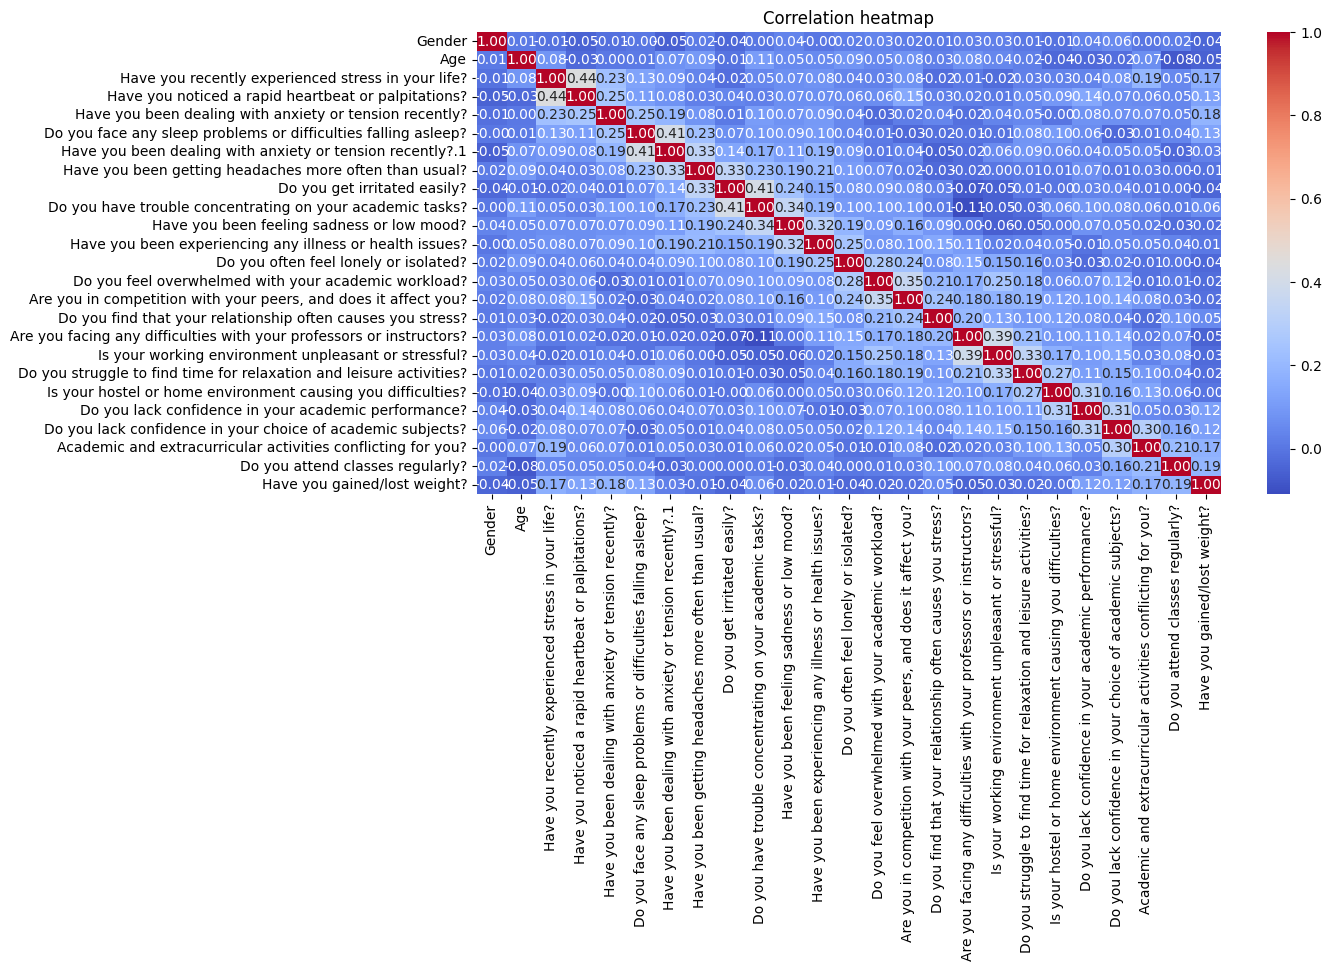

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

### AGE VS STRESS TYPE

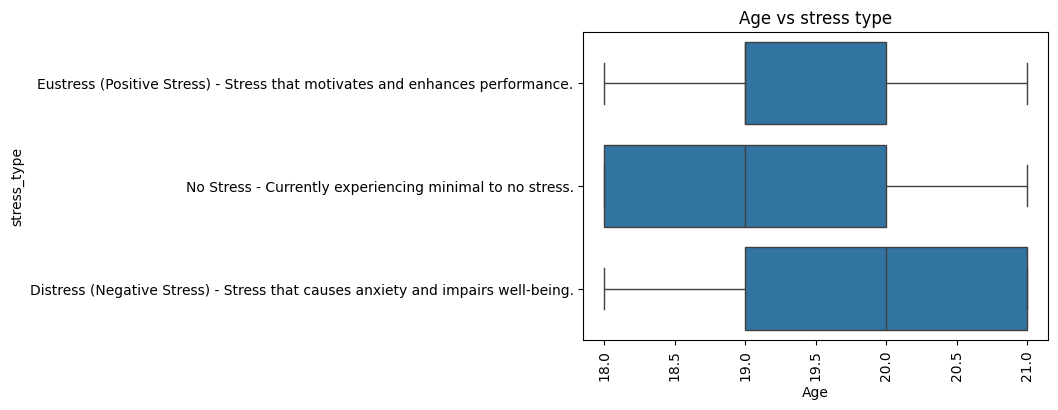

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Age',y='stress_type',data=df)
plt.title("Age vs stress type")
plt.xticks(rotation=90)
plt.show()

### GENDER VS STRESS TYPE

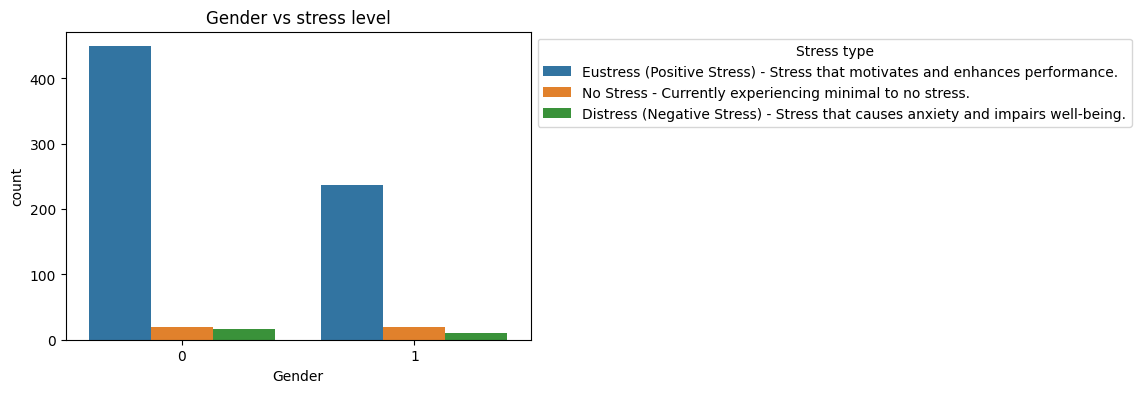

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',hue='stress_type',data=df)
plt.title("Gender vs stress level")
plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Stress type')
plt.show()

### MEAN VALUES PER STRESS TYPE

stress_type,Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.,Eustress (Positive Stress) - Stress that motivates and enhances performance.,No Stress - Currently experiencing minimal to no stress.
Gender,0.384615,0.345481,0.500000
Age,19.846154,19.498542,19.105263
Have you recently experienced stress in your life?,3.961538,3.017493,2.210526
Have you noticed a rapid heartbeat or palpitations?,4.192308,2.774052,1.868421
Have you been dealing with anxiety or tension recently?,3.884615,2.559767,1.684211
Do you face any sleep problems or difficulties falling asleep?,4.153846,2.794461,1.789474
Have you been dealing with anxiety or tension recently?.1,4.153846,2.669096,1.763158
Have you been getting headaches more often than usual?,4.153846,2.622449,1.894737
Do you get irritated easily?,4.230769,2.669096,1.763158
Do you have trouble concentrating on your academic tasks?,4.269231,2.704082,1.973684


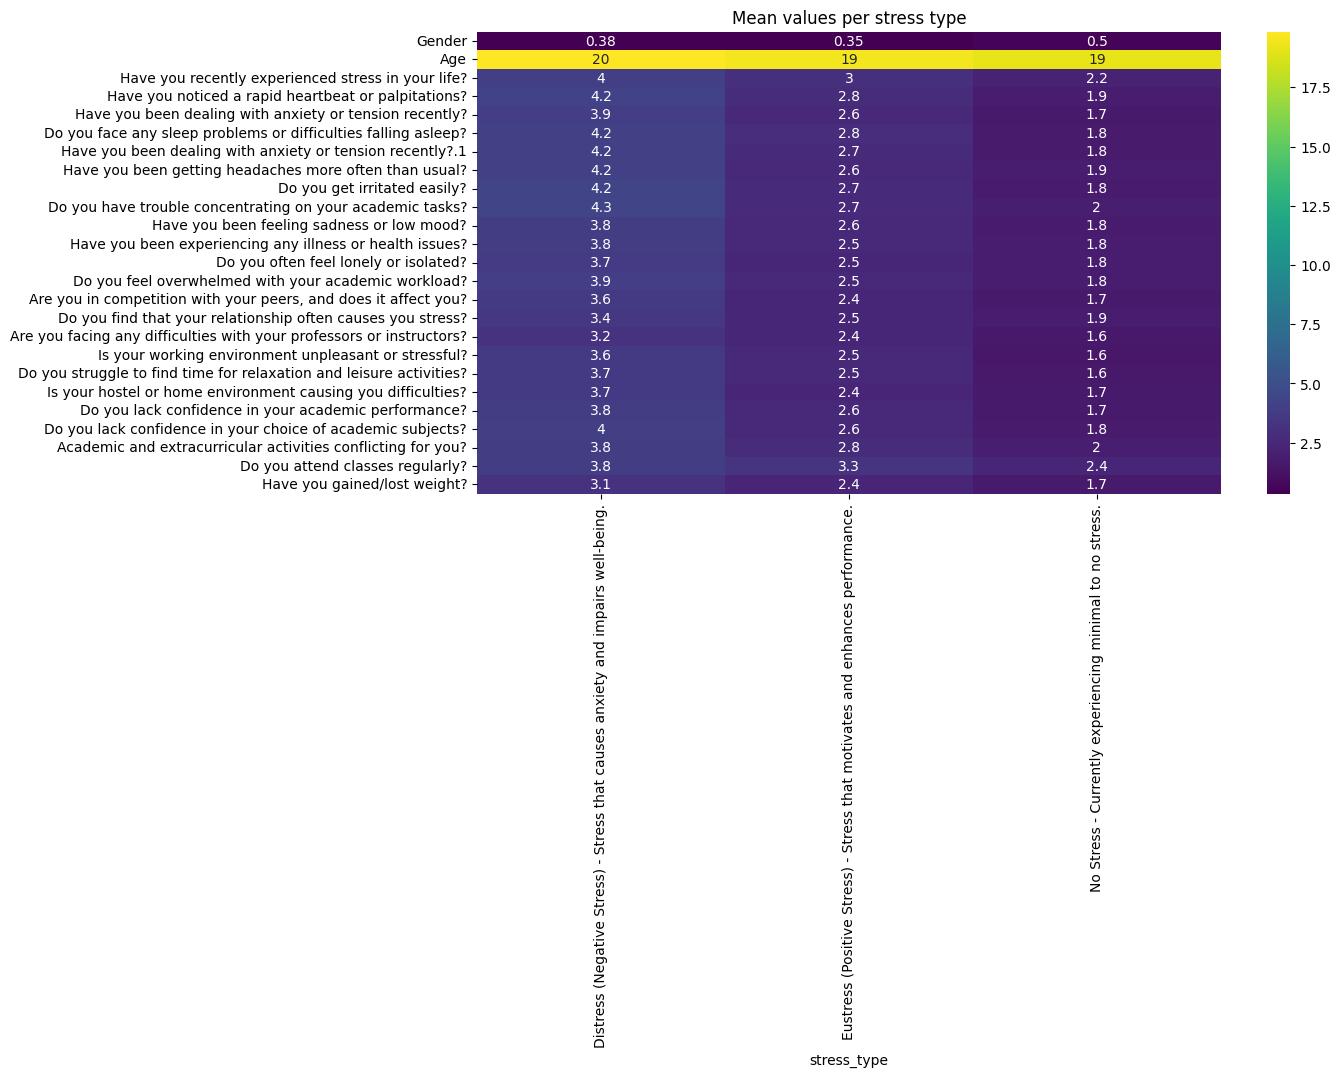

In [11]:
mean_type=df.groupby("stress_type")[num_cols].mean().T
display(mean_type)

plt.figure(figsize=(12,6))
sns.heatmap(mean_type,annot=True,cmap="viridis")
plt.title("Mean values per stress type")
plt.show()